In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df=data.iloc[:,3:]
df=pd.concat([df,pd.get_dummies(df['Geography'])],axis=1)
df=df.drop(columns=['Geography'])
df=pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)
df=df.drop(columns=['Gender'])
df=df.rename(columns = {'Male':'Gender'})
df=df.drop(columns=['Female'])

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1


<Axes: >

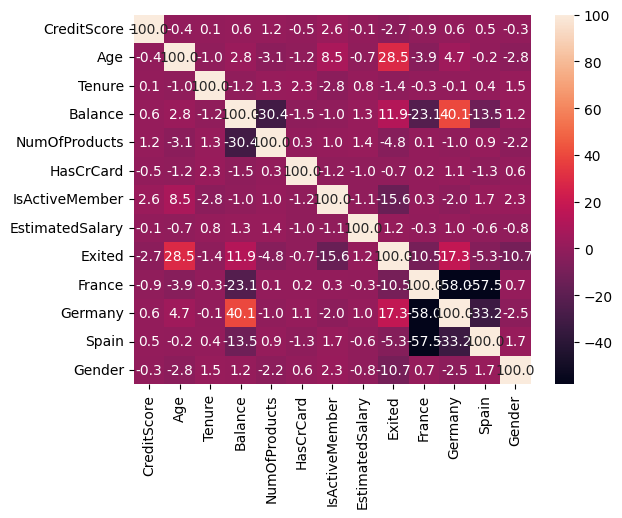

In [ ]:
corr = 100 * df.corr()
sns.heatmap(corr, annot=True, fmt='.1f')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = ['Tenure','EstimatedSalary','NumOfProducts','Age','Balance','CreditScore']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
X=df.drop(columns=['Exited'])
y=df.Exited

In [ ]:
X.shape,y.shape

((10000, 12), (10000,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

X_train.shape, X_test.shape

((8000, 12), (2000, 12))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(23, activation='relu', input_shape=(12,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4931 - accuracy: 0.7788
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8261
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8416
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8465
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8511
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3514 - accuracy: 0.8549
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8576
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.8575
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8590
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8586

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

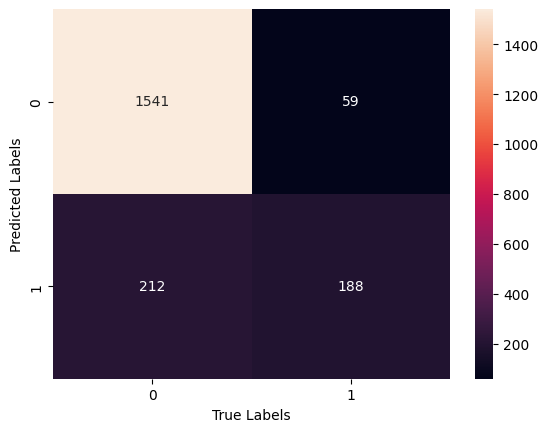

In [ ]:
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel("Predicted Labels")
plt.xlabel("True Labels")
plt.show()